In [2]:
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

In [3]:
df_queries = pd.read_csv("../data/raw/data_set_phase1/train_queries.csv")

In [4]:
df_queries['req_time'] = pd.to_datetime(df_queries['req_time'])

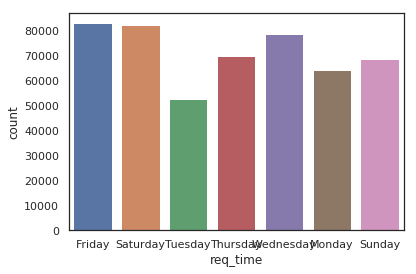

In [5]:
sns.countplot(df_queries['req_time'].dt.day_name())

In [6]:
df_queries['weekend'] = df_queries['req_time'].dt.day_name().apply(lambda x: 1 if x in ["Friday", "Saturday"] else 0)

In [7]:
df_queries['req_date'] = df_queries['req_time'].dt.strftime('%m-%d')

In [8]:
df_queries['req_hour'] = df_queries['req_time'].dt.hour
df_queries['req_hour_bin'] = df_queries['req_hour'].apply(lambda x: 'night' if x <= 7 else ('day' if x in range(8,18) else 'evening'))

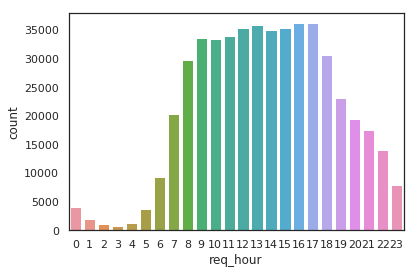

In [8]:
sns.countplot(df_queries.req_hour)

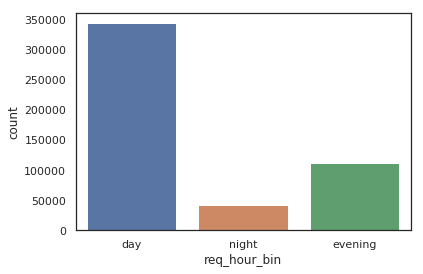

In [9]:
sns.countplot(df_queries.req_hour_bin)

In [9]:
df_queries.sample(10)

,sid,pid,req_time,o,d,weekend,req_date,req_hour,req_hour_bin
386601,2555012,126051.0,2018-11-19 22:33:47,"116.32,39.79","116.61,40.12",0,11-19,22,evening
498477,808625,176254.0,2018-10-29 22:59:27,"116.20,39.90","116.50,39.79",0,10-29,22,evening
405117,2311357,NaN,2018-10-25 07:12:38,"116.33,39.72","116.41,39.91",0,10-25,7,night
464815,136033,194728.0,2018-10-08 12:57:52,"116.39,39.98","116.26,39.99",0,10-08,12,day
146889,1696808,NaN,2018-10-23 11:37:49,"116.55,39.91","116.55,39.92",0,10-23,11,day
80994,523263,112198.0,2018-11-23 23:26:11,"116.31,40.03","116.41,40.04",1,11-23,23,evening
161621,2895913,NaN,2018-10-06 13:59:19,"116.43,39.94","116.31,40.07",1,10-06,13,day
191649,409136,202643.0,2018-10-05 01:35:42,"116.20,39.85","116.41,39.91",1,10-05,1,night
259462,152732,NaN,2018-10-20 08:06:04,"116.37,39.90","116.33,39.99",1,10-20,8,day
66580,2012795,204347.0,2018-10-14 08:03:12,"116.44,39.80","116.42,39.90",0,10-14,8,day


In [12]:
df_queries[['req_month','req_day']] = df_queries.req_date.str.split("-",expand=True,).astype(int)

In [15]:
df_queries = df_queries.drop('req_date', axis=1)

In [16]:
df_queries.sample(10)

,sid,pid,req_time,o,d,weekend,req_hour,req_hour_bin,req_month,req_day
428815,2565498,NaN,2018-11-19 18:26:11,"116.41,40.00","116.42,39.90",0,18,evening,11,19
295061,2805061,146293.0,2018-10-30 04:22:30,"116.42,39.85","116.37,39.91",0,4,night,10,30
219457,168025,NaN,2018-10-20 00:00:47,"116.30,39.96","116.65,39.89",1,0,night,10,20
245522,1807911,204013.0,2018-11-29 14:46:47,"116.39,39.89","116.35,39.97",0,14,day,11,29
111093,552244,NaN,2018-11-23 21:26:18,"116.42,39.94","116.39,39.91",1,21,evening,11,23
92693,855401,NaN,2018-11-26 18:39:23,"116.31,39.97","116.30,39.97",0,18,evening,11,26
165883,379984,100011.0,2018-10-05 10:33:58,"116.39,39.91","116.39,39.90",1,10,day,10,5
178755,3169937,140647.0,2018-11-21 11:46:54,"116.37,39.86","116.36,39.88",0,11,day,11,21
169138,1101367,NaN,2018-11-08 15:33:12,"116.30,40.09","116.33,40.08",0,15,day,11,8
451577,1874131,194929.0,2018-11-03 10:09:15,"116.40,39.94","116.40,39.94",1,10,day,11,3
